<a href="https://colab.research.google.com/github/SorayaFrancoLopez/NN_churn_proyect_insurance/blob/main/STEP_2_Feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Estos datos deberan cargarse con el df limpio al que se ha realizado SMOTE
df = pd.read_csv("/content/drive/MyDrive/Churn Rate Algorithm/dfclean.csv", delimiter=',', encoding='latin1')

In [4]:
df.head()

,MEDCOD,Edad,AnosCliente,sCodPostal,sNomEstadoCivil,SEXO,Num_Pol_Vigor_Menos0,NumeRecibos_Menos0,PrimasPagadas_Menos0,Num_Siniestros_Menos0,...,NumeRecibos_Menos3,PrimasPagadas_Menos3,Num_Siniestros_Menos3,Num_Pol_Vigor_Hogar_Menos3,Num_Pol_Vigor_Autos_Menos3,Num_Pol_Vigor_Decesos_Menos3,Num_Pol_Vigor_Salud_Menos3,Num_Pol_Vigor_PensionesVida_Menos3,Num_Pol_Vigor_Resto_Menos3,EsBaja
0,53,59,16.0,28,1,1,1,1,115.98,0,...,1,112.42,0,False,False,False,False,False,True,False
1,10408,70,5.0,8,2,1,2,5,917.17,2,...,1,139.15,0,False,True,False,False,False,False,False
2,5860,60,6.0,17,1,1,1,0,0.00,0,...,0,0.00,0,False,False,False,False,False,True,False
3,9882,58,5.0,8,2,1,1,1,442.17,0,...,1,392.12,0,False,True,False,False,False,False,False
4,5999,72,6.0,29,4,1,0,0,0.00,0,...,2,426.60,0,False,False,False,False,False,True,True


In [5]:
#Columnas que posee el dataframe
df.columns

Index(['MEDCOD', 'Edad', 'AnosCliente', 'sCodPostal', 'sNomEstadoCivil',
       'SEXO', 'Num_Pol_Vigor_Menos0', 'NumeRecibos_Menos0',
       'PrimasPagadas_Menos0', 'Num_Siniestros_Menos0',
       'Num_Pol_Vigor_Hogar_Menos0', 'Num_Pol_Vigor_Autos_Menos0',
       'Num_Pol_Vigor_Decesos_Menos0', 'Num_Pol_Vigor_Salud_Menos0',
       'Num_Pol_Vigor_PensionesVida_Menos0', 'Num_Pol_Vigor_Resto_Menos0',
       'Num_Pol_Vigor_Menos1', 'NumeRecibos_Menos1', 'PrimasPagadas_Menos1',
       'Num_Siniestros_Menos1', 'Num_Pol_Vigor_Hogar_Menos1',
       'Num_Pol_Vigor_Autos_Menos1', 'Num_Pol_Vigor_Decesos_Menos1',
       'Num_Pol_Vigor_Salud_Menos1', 'Num_Pol_Vigor_PensionesVida_Menos1',
       'Num_Pol_Vigor_Resto_Menos1', 'Num_Pol_Vigor_Menos2',
       'NumeRecibos_Menos2', 'PrimasPagadas_Menos2', 'Num_Siniestros_Menos2',
       'Num_Pol_Vigor_Hogar_Menos2', 'Num_Pol_Vigor_Autos_Menos2',
       'Num_Pol_Vigor_Decesos_Menos2', 'Num_Pol_Vigor_Salud_Menos2',
       'Num_Pol_Vigor_PensionesVida_Menos

###FEATURE IMPORTANCE MEDIANTE TREE DECISION

El objetivo de esta parte del trabajo es realizar una elección de aquellas variables que son más importantes para determinar el Target.

"Feature importance" (importancia de características) es una técnica utilizada en aprendizaje automático para determinar qué variables o características tienen más influencia en la predicción de la variable objetivo.

En este caso utilizaremos un Decision Tree. Los árboles de decisión son modelos de aprendizaje supervisado que aprenden reglas de decisión simples inferidas a partir de las características de los datos.

In [6]:
#Dividimos en train y test
X = df.drop(columns=['EsBaja'])  # Variables predictoras
y = df['EsBaja']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=100)

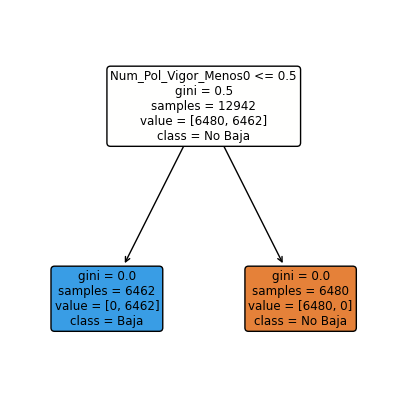

In [7]:
plt.figure(figsize=(5,5))
plot_tree(tree, feature_names=X.columns, class_names=['No Baja', 'Baja'], filled=True, rounded=True, max_depth=3)
plt.show()

La conclusion de este primer árbol es que la variable Num_Pol_Vigor_Menos0 tiene una repercusión del 100% a la hora de determinar si un cliente es baja o no.

Es importante considerar que una variable con una importancia del 100% en un árbol de decisión no siempre significa que sea un predictor confiable o necesario. En este caso, parece que la variable "Num_Pol_Vigor_Menos0" podría estar sesgando el modelo de manera incorrecta, tal y como sospechabamos en nuestro analisis anterior.

In [8]:
#Evaluación del modelo
y_pred_proba = tree.predict_proba(X_test)[:, 1]
y_pred = tree.predict(X_test)

In [9]:
def evaluacion(y_true, y_pred, y_pred_proba):
    """
    Realiza operaciones de métricas de evaluación sobre los resultados del entrenamiento.

    Parámetros:
        - y_true: Etiquetas verdaderas.
        - y_pred: Etiquetas predichas.
        - y_pred_proba: Probabilidades predichas.

    Retorna:
        - Accuracy del modelo
        - Precision_score
        - Recall_score
        - F1_score
        - Matriz de confusión
        - Calculo de ROC-AUC
        - Curva ROC
        - Curva de precisión y recuperación.
        - Gráficas de métricas:
            * Curva ROC
            * Curva de precisión
            * Matriz de Confusión
            * Histograma de Probabilidad
    """

    # Accuracy, la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    # Precisión, mide la proporción de instancias positivas correctamente identificadas por el modelo entre todas las instancias que el modelo ha predicho como positivas.
    precision = precision_score(y_true, y_pred)
    print("Precision:", precision)

    # Recall, Es la exhaustividad que mide la capacidad del modelo para capturar todos los casos positivos.
    recall = recall_score(y_true, y_pred)
    print("Recall:", recall)

    # F1-score, combina la precisión (precision) y la exhaustividad (recall) en un solo número entre 0 y 1
    f1 = f1_score(y_true, y_pred)
    print("F1-score:", f1)

    # Matriz de Confusión, las filas representan las clases reales, mientras que las columnas representan las clases predichas por el modelo.
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calcula la ROC-AUC, para evaluar el rendimiento de un modelo de clasificación binaria.
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print("ROC-AUC Score:", roc_auc)

    # Calcula la curva ROC, tasa de verdaderos positivos (TPR, True Positive Rate) en el eje y versus la tasa de falsos positivos (FPR, False Positive Rate) en el eje x.
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

    # Calcula la curva de precisión y recuperación
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)

    # Gráficos
    plt.figure(figsize=(6, 6))

    # Curva ROC
    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

    # Curva de precisión y recuperación
    plt.subplot(2, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    # Matriz de confusión
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Matriz de Confusión')

    # Histograma de probabilidades predichas
    plt.subplot(2, 2, 4)
    plt.hist(y_pred_proba, bins=20, color='orange', alpha=0.7)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Histograma de probabilidades')
    plt.tight_layout()
    plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[1609    0]
 [   0 1627]]
ROC-AUC Score: 1.0


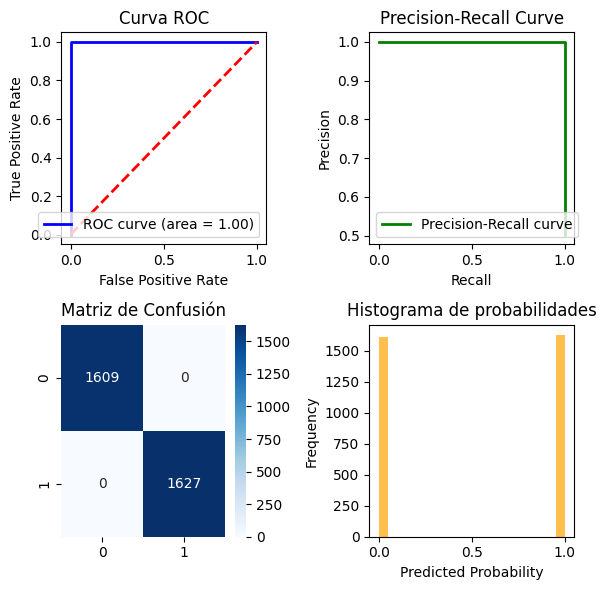

In [10]:
evaluacion(y_test, y_pred, y_pred_proba)

ROC CURVE
Cuanto más se aleje la curva azul de la línea roja diagonal, mejor será el rendimiento del modelo. Esto indica que el modelo está logrando una alta tasa de verdaderos positivos mientras mantiene una baja tasa de falsos positivos, lo que resulta en un ROC-AUC más alto y un mejor rendimiento general del modelo.

PRECISION RECALL
Idealmente la curva Precision-Recall debe estar lo más cerca posible del punto (1,1), lo que indicaría una precisión perfecta y una exhaustividad perfecta. Sin embargo, en la mayoría de los casos, hay un equilibrio entre la precisión y la exhaustividad, lo que significa que mejorar una de las métricas puede resultar en un deterioro de la otra. La forma y la posición de la curva verde en el gráfico muestran este equilibrio y la capacidad del modelo para clasificar correctamente las instancias positivas mientras minimiza los falsos positivos.

HISTOGRAMA DE PROBABILIDADES
Un histograma de probabilidades bien calibrado tendría una distribución que refleje correctamente la incertidumbre del modelo: es decir, para las instancias clasificadas correctamente, las probabilidades deberían estar cerca de 1 para la clase correcta y cerca de 0 para la clase incorrecta. Además, las instancias mal clasificadas deberían tener probabilidades más cercanas a 0.5.

In [11]:
# rendimiento
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")

#importancia de las variables
feature_importance = tree.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Precisión del árbol de decisión: 1.00
MEDCOD: 0.0000
Edad: 0.0000
AnosCliente: 0.0000
sCodPostal: 0.0000
sNomEstadoCivil: 0.0000
SEXO: 0.0000
Num_Pol_Vigor_Menos0: 1.0000
NumeRecibos_Menos0: 0.0000
PrimasPagadas_Menos0: 0.0000
Num_Siniestros_Menos0: 0.0000
Num_Pol_Vigor_Hogar_Menos0: 0.0000
Num_Pol_Vigor_Autos_Menos0: 0.0000
Num_Pol_Vigor_Decesos_Menos0: 0.0000
Num_Pol_Vigor_Salud_Menos0: 0.0000
Num_Pol_Vigor_PensionesVida_Menos0: 0.0000
Num_Pol_Vigor_Resto_Menos0: 0.0000
Num_Pol_Vigor_Menos1: 0.0000
NumeRecibos_Menos1: 0.0000
PrimasPagadas_Menos1: 0.0000
Num_Siniestros_Menos1: 0.0000
Num_Pol_Vigor_Hogar_Menos1: 0.0000
Num_Pol_Vigor_Autos_Menos1: 0.0000
Num_Pol_Vigor_Decesos_Menos1: 0.0000
Num_Pol_Vigor_Salud_Menos1: 0.0000
Num_Pol_Vigor_PensionesVida_Menos1: 0.0000
Num_Pol_Vigor_Resto_Menos1: 0.0000
Num_Pol_Vigor_Menos2: 0.0000
NumeRecibos_Menos2: 0.0000
PrimasPagadas_Menos2: 0.0000
Num_Siniestros_Menos2: 0.0000
Num_Pol_Vigor_Hogar_Menos2: 0.0000
Num_Pol_Vigor_Autos_Menos2: 0.0000
Num

#Conclusiones sobre el primer árbol.
Los resultados que hemos visualizado nos muestran no solo un sobre ajuste en el modelo sino que además es muy probable que la variable Num_Pol_Vigor_Menos0 no nos dé información necesaria. Es lógico pensar que si un cliente no tiene polizas en vigor es baja y por tanto no cabe otro resultado.

Lo que vimos en el EDA se observa aquí mucho más claramente.

#ARBOL SEGUNDO sin variable Num_Pol_Vigor_Menos0

In [12]:
df = df.drop('Num_Pol_Vigor_Menos0', axis = 1)

Probamos a eliminar esta variable del dataframe para observar que resultados arroja.

In [13]:
X = df.drop(columns=['EsBaja'])  # Variables predictoras
y = df['EsBaja']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=100)

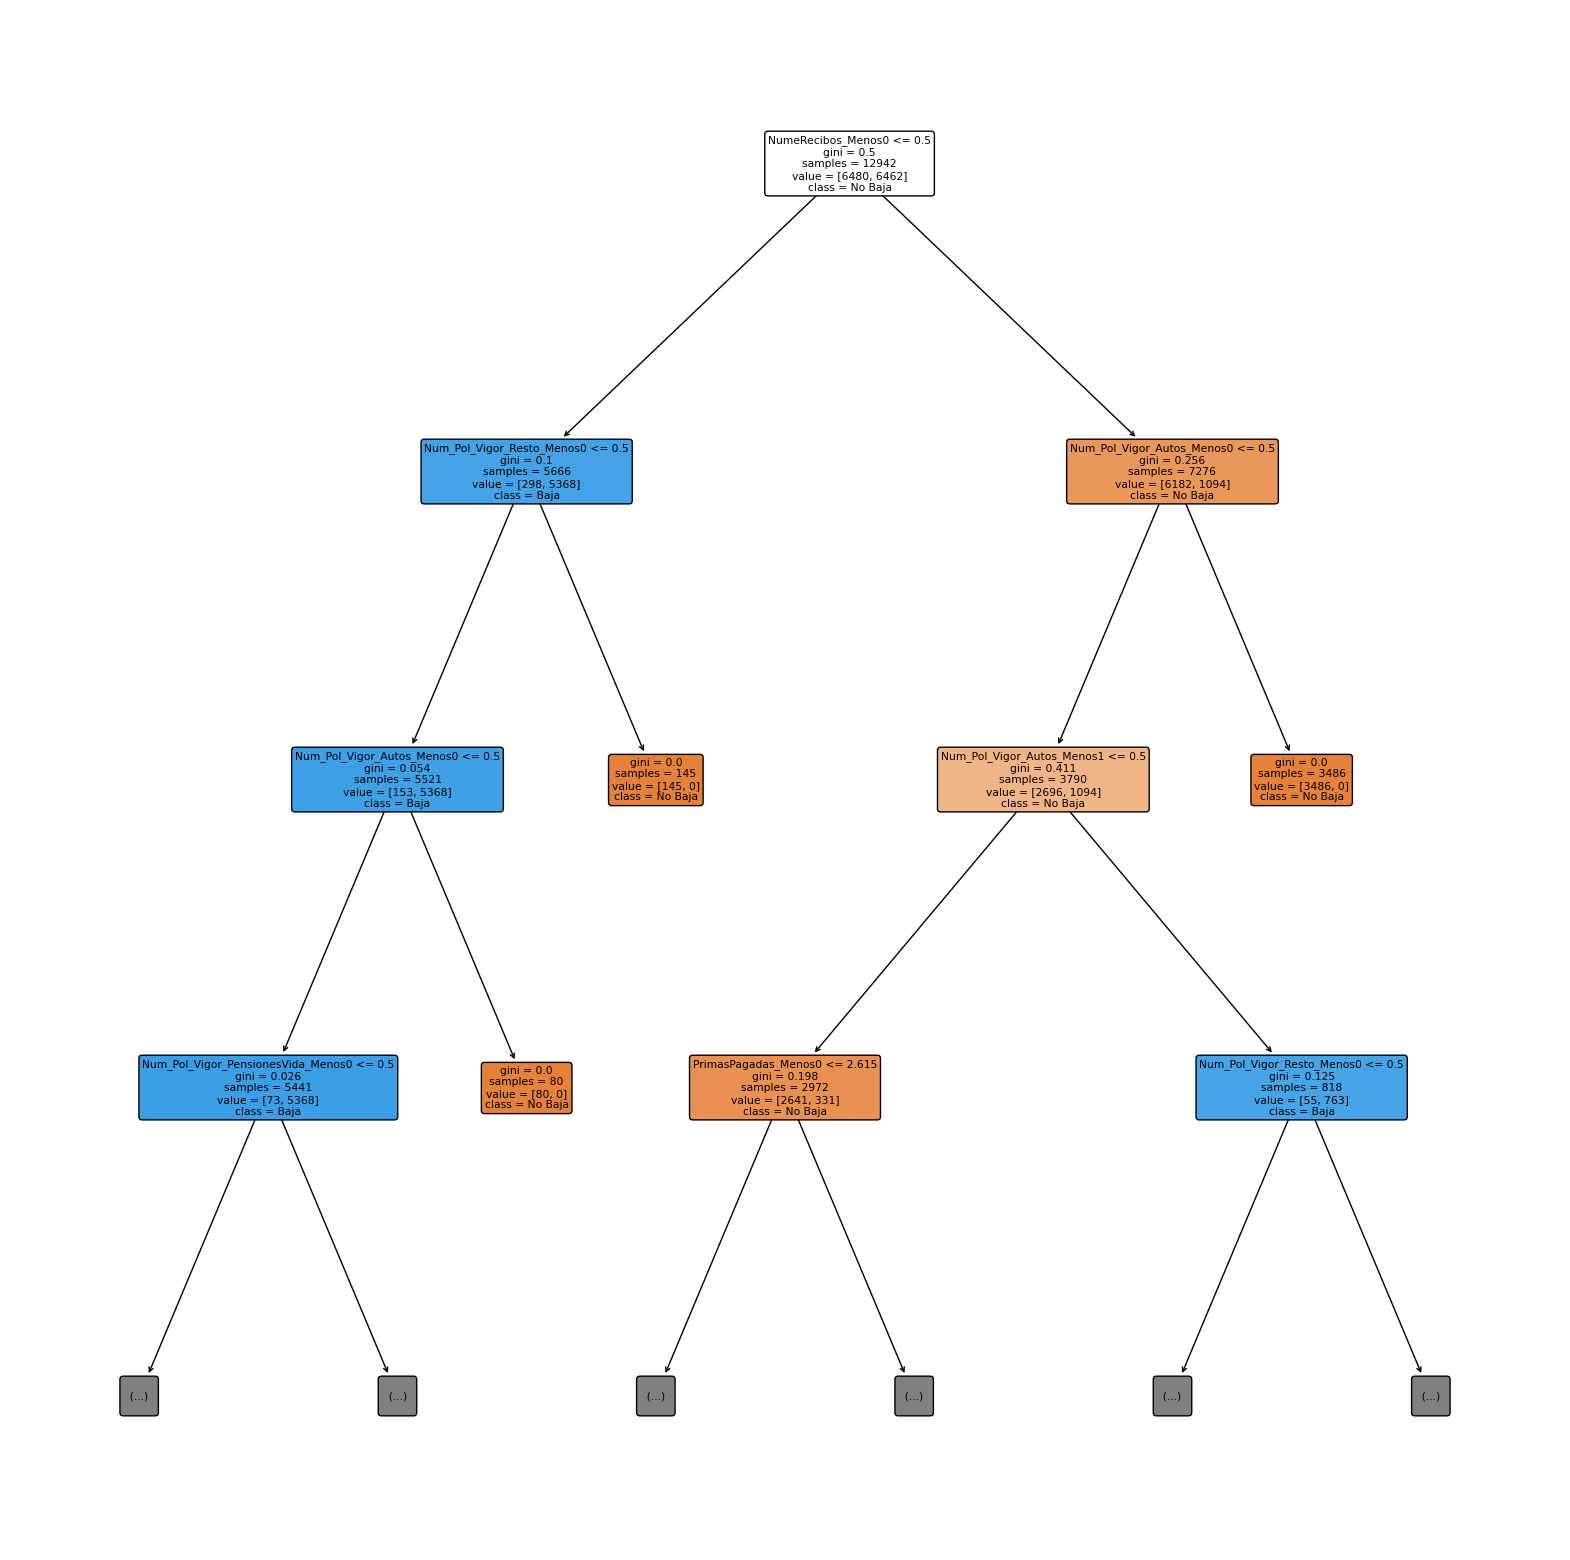

In [14]:
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=X.columns, class_names=['No Baja', 'Baja'], filled=True, rounded=True, max_depth=3)
plt.show()

In [15]:
y_pred_proba = tree.predict_proba(X_test)[:, 1]
y_pred = tree.predict(X_test)

Accuracy: 0.9712608158220025
Precision: 0.9823899371069182
Recall: 0.9600491702519975
F1-score: 0.9710910786447
Confusion Matrix:
 [[1581   28]
 [  65 1562]]
ROC-AUC Score: 0.985997632401943


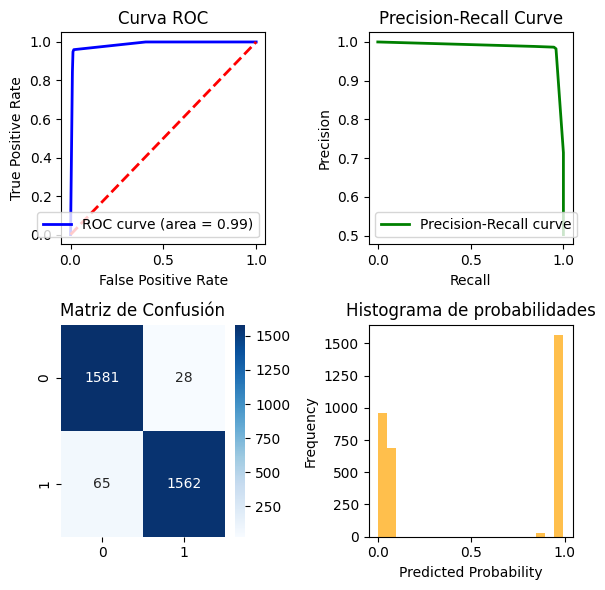

In [16]:
evaluacion(y_test, y_pred, y_pred_proba)

Si bien estos resultados son más alentadores seguimos pensando que los datos que tienen que ver con el grupo X_Menos0 interfieren bastante en la realidad.

In [17]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")

feature_importance = tree.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Precisión del árbol de decisión: 0.97
MEDCOD: 0.0000
Edad: 0.0000
AnosCliente: 0.0000
sCodPostal: 0.0000
sNomEstadoCivil: 0.0000
SEXO: 0.0000
NumeRecibos_Menos0: 0.6897
PrimasPagadas_Menos0: 0.0203
Num_Siniestros_Menos0: 0.0000
Num_Pol_Vigor_Hogar_Menos0: 0.0000
Num_Pol_Vigor_Autos_Menos0: 0.0777
Num_Pol_Vigor_Decesos_Menos0: 0.0000
Num_Pol_Vigor_Salud_Menos0: 0.0000
Num_Pol_Vigor_PensionesVida_Menos0: 0.0100
Num_Pol_Vigor_Resto_Menos0: 0.0548
Num_Pol_Vigor_Menos1: 0.0000
NumeRecibos_Menos1: 0.0000
PrimasPagadas_Menos1: 0.0000
Num_Siniestros_Menos1: 0.0000
Num_Pol_Vigor_Hogar_Menos1: 0.0000
Num_Pol_Vigor_Autos_Menos1: 0.1475
Num_Pol_Vigor_Decesos_Menos1: 0.0000
Num_Pol_Vigor_Salud_Menos1: 0.0000
Num_Pol_Vigor_PensionesVida_Menos1: 0.0000
Num_Pol_Vigor_Resto_Menos1: 0.0000
Num_Pol_Vigor_Menos2: 0.0000
NumeRecibos_Menos2: 0.0000
PrimasPagadas_Menos2: 0.0000
Num_Siniestros_Menos2: 0.0000
Num_Pol_Vigor_Hogar_Menos2: 0.0000
Num_Pol_Vigor_Autos_Menos2: 0.0000
Num_Pol_Vigor_Decesos_Menos2: 0.

### **NumeRecibos_Menos0: 68.97%**

Esta variable es la más determinante para predecir si un cliente se da de baja o no. Es lógico pensar que un cliente sin recibos en vigor en el mismo año es probable que cancele su suscripción.

### **Num_Pol_Vigor_Autos_Menos1: 14.75%**

La presencia de un número específico de pólizas de seguros de automóviles vigentes del año anterior parece ser un factor importante en la predicción.


Los siguientes valores tienen una importancia relativa más baja y pueden no ser prioritarios para investigar en este momento:

PrimasPagadas_Menos0: 2.03%
Num_Pol_Vigor_Autos_Menos0: 7.77%
Num_Pol_Vigor_PensionesVida_Menos0: 1.00%
Num_Pol_Vigor_Resto_Menos0: 5.48%


#ARBOL TERCERO

In [19]:
columnas_eliminar = ['Num_Pol_Vigor_Resto_Menos0','PrimasPagadas_Menos0', 'Num_Pol_Vigor_Hogar_Menos0', 'Num_Pol_Vigor_Autos_Menos0', 'Num_Pol_Vigor_Decesos_Menos0', 'Num_Pol_Vigor_Salud_Menos0', 'Num_Pol_Vigor_PensionesVida_Menos0']
df = df.drop(columnas_eliminar, axis =1)

In [20]:
df.columns

Index(['MEDCOD', 'Edad', 'AnosCliente', 'sCodPostal', 'sNomEstadoCivil',
       'SEXO', 'NumeRecibos_Menos0', 'Num_Siniestros_Menos0',
       'Num_Pol_Vigor_Menos1', 'NumeRecibos_Menos1', 'PrimasPagadas_Menos1',
       'Num_Siniestros_Menos1', 'Num_Pol_Vigor_Hogar_Menos1',
       'Num_Pol_Vigor_Autos_Menos1', 'Num_Pol_Vigor_Decesos_Menos1',
       'Num_Pol_Vigor_Salud_Menos1', 'Num_Pol_Vigor_PensionesVida_Menos1',
       'Num_Pol_Vigor_Resto_Menos1', 'Num_Pol_Vigor_Menos2',
       'NumeRecibos_Menos2', 'PrimasPagadas_Menos2', 'Num_Siniestros_Menos2',
       'Num_Pol_Vigor_Hogar_Menos2', 'Num_Pol_Vigor_Autos_Menos2',
       'Num_Pol_Vigor_Decesos_Menos2', 'Num_Pol_Vigor_Salud_Menos2',
       'Num_Pol_Vigor_PensionesVida_Menos2', 'Num_Pol_Vigor_Resto_Menos2',
       'Num_Pol_Vigor_Menos3', 'NumeRecibos_Menos3', 'PrimasPagadas_Menos3',
       'Num_Siniestros_Menos3', 'Num_Pol_Vigor_Hogar_Menos3',
       'Num_Pol_Vigor_Autos_Menos3', 'Num_Pol_Vigor_Decesos_Menos3',
       'Num_Pol_Vigor_Sa

In [19]:
X = df.drop(columns=['EsBaja'])  # Variables predictoras
y = df['EsBaja']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=100)

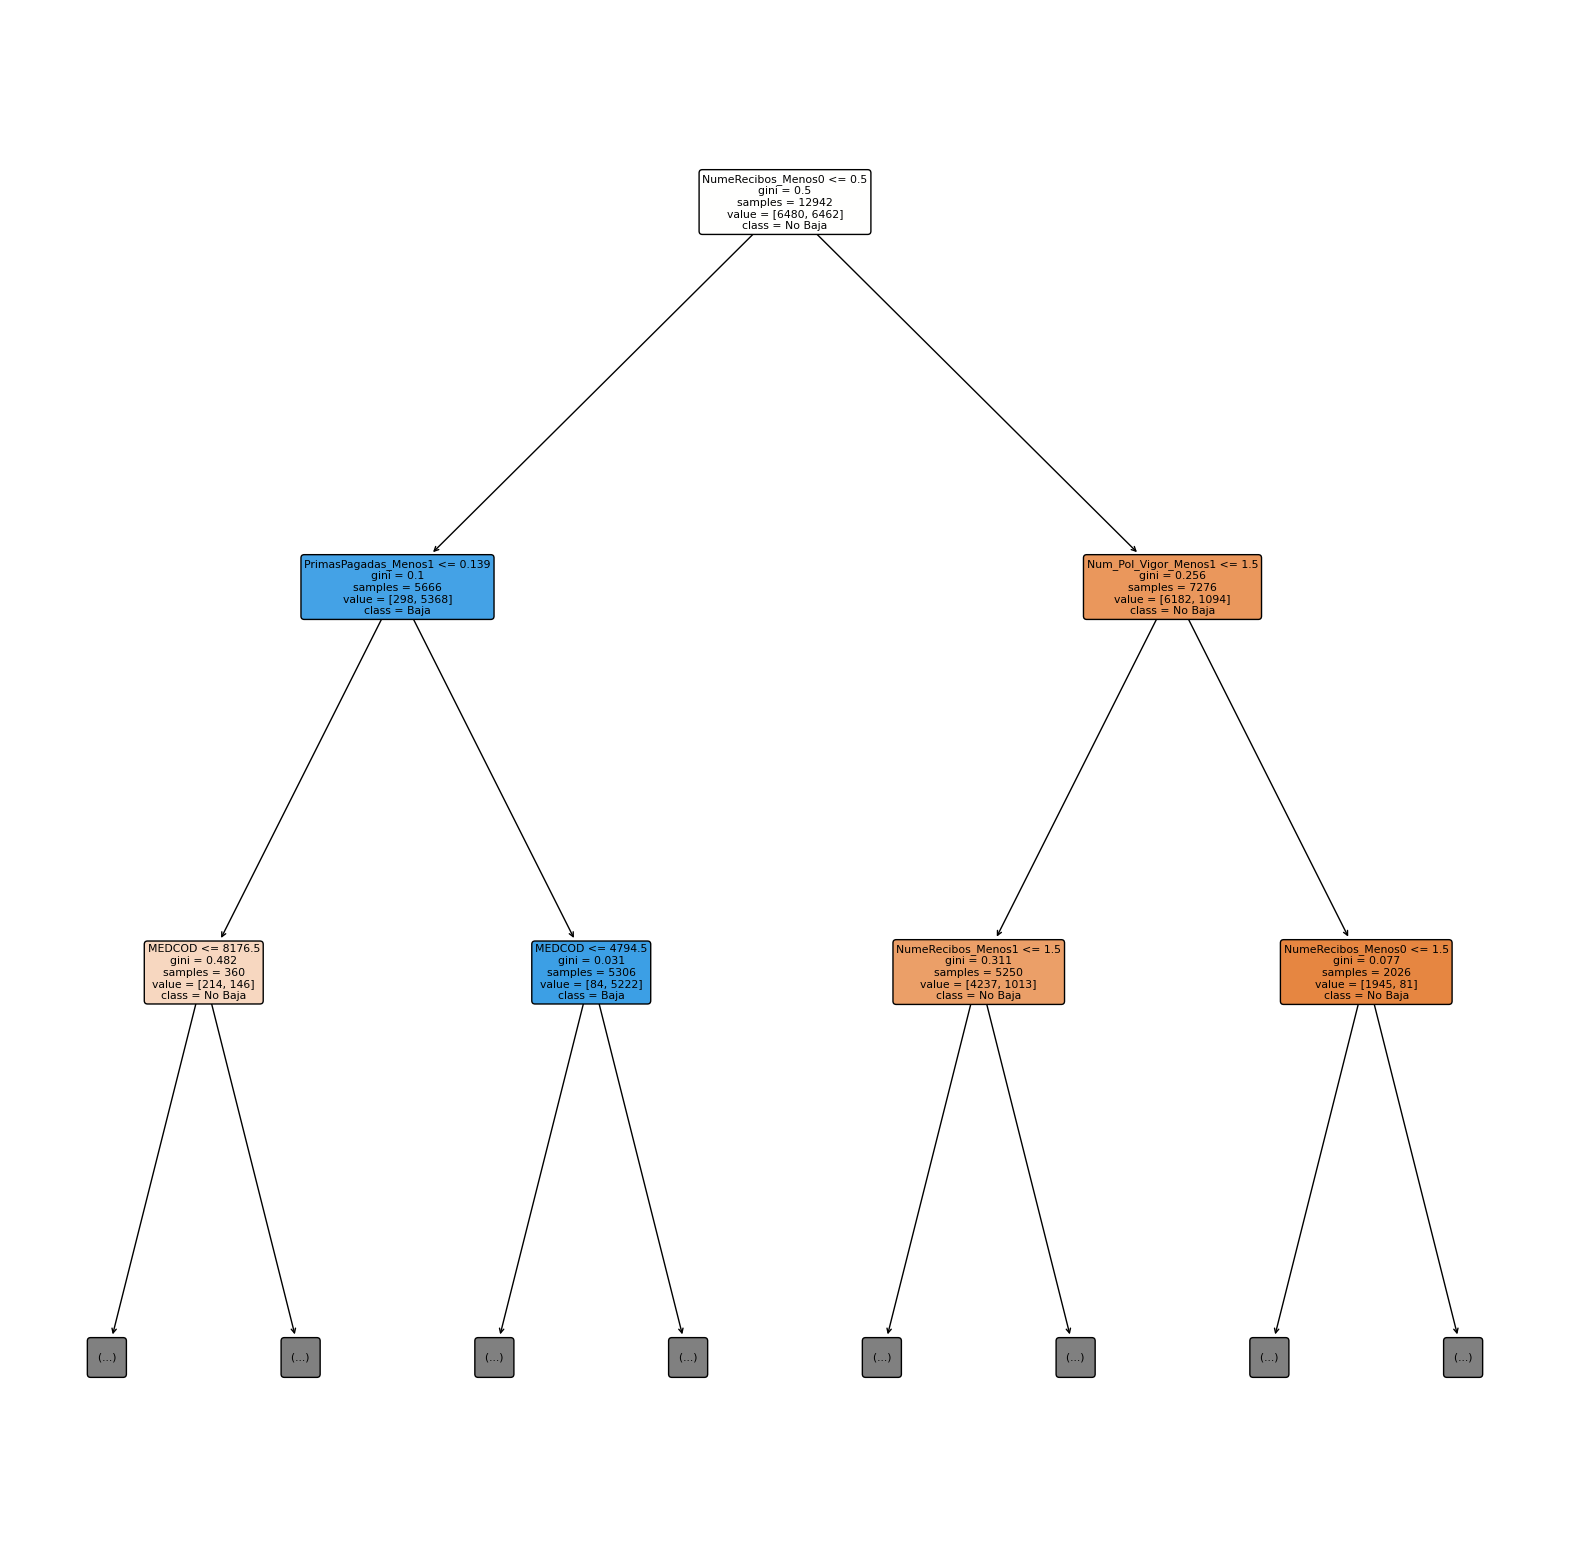

In [20]:
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=X.columns, class_names=['No Baja', 'Baja'], filled=True, rounded=True, max_depth=2)
plt.show()

In [21]:
y_pred_proba = tree.predict_proba(X_test)[:, 1]
y_pred = tree.predict(X_test)

Accuracy: 0.919344870210136
Precision: 0.9517195767195767
Recall: 0.8844499078057775
F1-score: 0.916852500796432
Confusion Matrix:
 [[1536   73]
 [ 188 1439]]
ROC-AUC Score: 0.9613515783796049


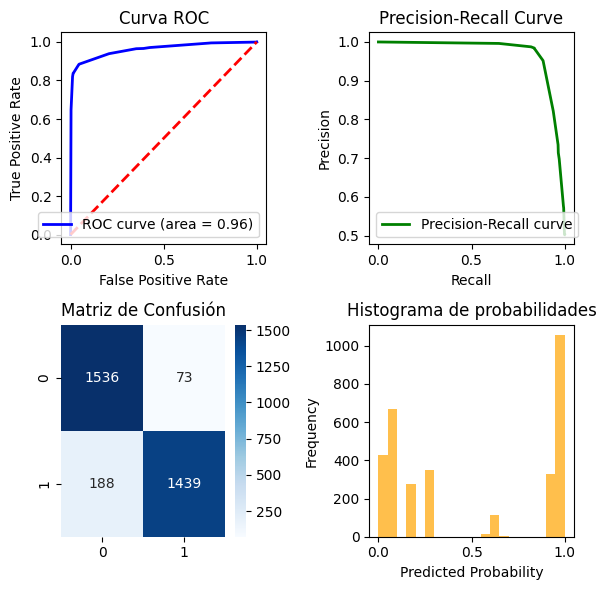

In [22]:
# Llama a la función evaluacion con los datos apropiados
evaluacion(y_test, y_pred, y_pred_proba)

In [23]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")

feature_importance = tree.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Precisión del árbol de decisión: 0.92
MEDCOD: 0.0249
Edad: 0.0015
AnosCliente: 0.0000
sCodPostal: 0.0000
sNomEstadoCivil: 0.0000
SEXO: 0.0000
NumeRecibos_Menos0: 0.8730
Num_Siniestros_Menos0: 0.0012
Num_Pol_Vigor_Menos1: 0.0144
NumeRecibos_Menos1: 0.0330
PrimasPagadas_Menos1: 0.0474
Num_Siniestros_Menos1: 0.0000
Num_Pol_Vigor_Hogar_Menos1: 0.0000
Num_Pol_Vigor_Autos_Menos1: 0.0000
Num_Pol_Vigor_Decesos_Menos1: 0.0000
Num_Pol_Vigor_Salud_Menos1: 0.0006
Num_Pol_Vigor_PensionesVida_Menos1: 0.0000
Num_Pol_Vigor_Resto_Menos1: 0.0000
Num_Pol_Vigor_Menos2: 0.0000
NumeRecibos_Menos2: 0.0000
PrimasPagadas_Menos2: 0.0000
Num_Siniestros_Menos2: 0.0000
Num_Pol_Vigor_Hogar_Menos2: 0.0000
Num_Pol_Vigor_Autos_Menos2: 0.0000
Num_Pol_Vigor_Decesos_Menos2: 0.0000
Num_Pol_Vigor_Salud_Menos2: 0.0000
Num_Pol_Vigor_PensionesVida_Menos2: 0.0000
Num_Pol_Vigor_Resto_Menos2: 0.0000
Num_Pol_Vigor_Menos3: 0.0041
NumeRecibos_Menos3: 0.0000
PrimasPagadas_Menos3: 0.0000
Num_Siniestros_Menos3: 0.0000
Num_Pol_Vigor_Ho

#ARBOL 4

In [24]:
columnas_eliminar = ['Num_Siniestros_Menos0']
df = df.drop(columnas_eliminar, axis =1)

In [25]:
X = df.drop(columns=['EsBaja'])  # Variables predictoras
y = df['EsBaja']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

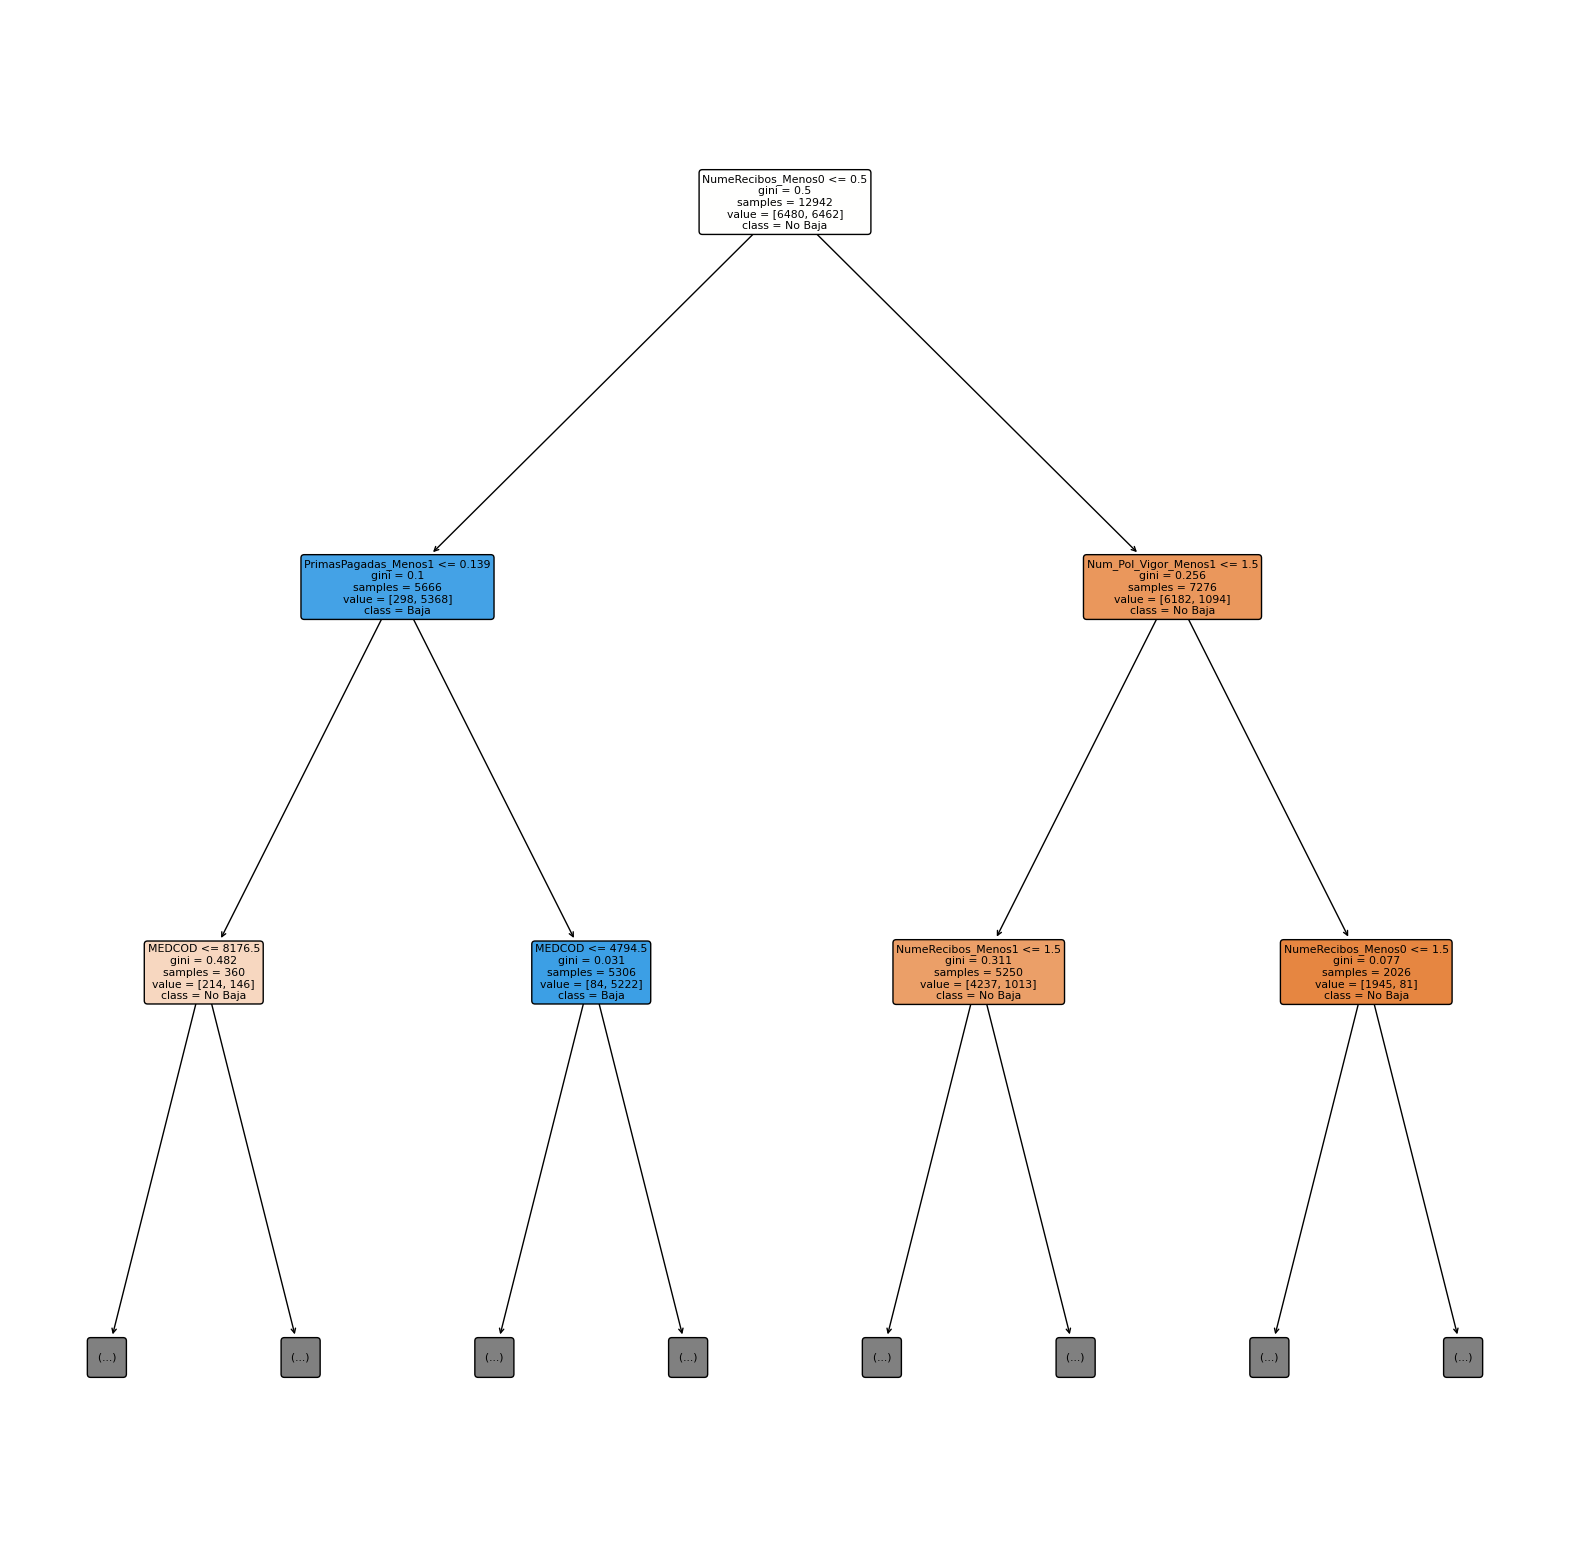

In [26]:
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=X.columns, class_names=['No Baja', 'Baja'], filled=True, rounded=True, max_depth=2)
plt.show()

In [27]:
#Evaluación del modelo
y_pred_proba = tree.predict_proba(X_test)[:, 1]
y_pred = tree.predict(X_test)

Accuracy: 0.9236711990111248
Precision: 0.9732510288065843
Recall: 0.8721573448063922
F1-score: 0.919935170178282
Confusion Matrix:
 [[1570   39]
 [ 208 1419]]
ROC-AUC Score: 0.966415480225514


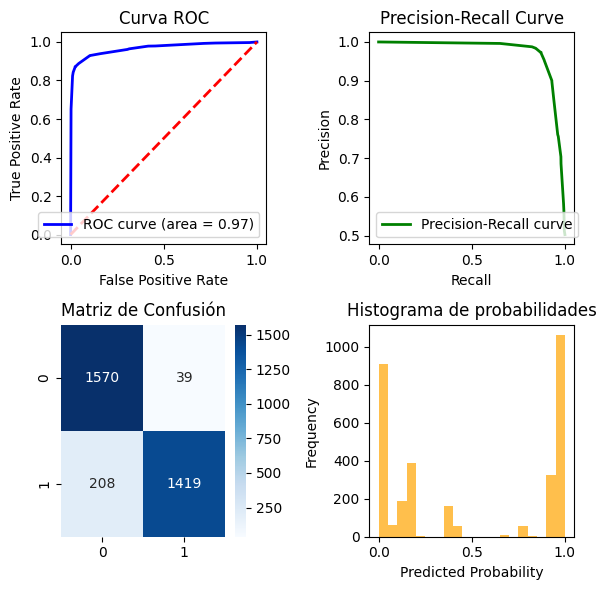

In [28]:
# Llama a la función evaluacion con los datos apropiados
evaluacion(y_test, y_pred, y_pred_proba)

In [29]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy:.2f}")

feature_importance = tree.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Precisión del árbol de decisión: 0.92
MEDCOD: 0.0292
Edad: 0.0026
AnosCliente: 0.0000
sCodPostal: 0.0007
sNomEstadoCivil: 0.0000
SEXO: 0.0000
NumeRecibos_Menos0: 0.8479
Num_Pol_Vigor_Menos1: 0.0139
NumeRecibos_Menos1: 0.0405
PrimasPagadas_Menos1: 0.0474
Num_Siniestros_Menos1: 0.0001
Num_Pol_Vigor_Hogar_Menos1: 0.0000
Num_Pol_Vigor_Autos_Menos1: 0.0000
Num_Pol_Vigor_Decesos_Menos1: 0.0000
Num_Pol_Vigor_Salud_Menos1: 0.0005
Num_Pol_Vigor_PensionesVida_Menos1: 0.0000
Num_Pol_Vigor_Resto_Menos1: 0.0000
Num_Pol_Vigor_Menos2: 0.0000
NumeRecibos_Menos2: 0.0062
PrimasPagadas_Menos2: 0.0004
Num_Siniestros_Menos2: 0.0010
Num_Pol_Vigor_Hogar_Menos2: 0.0000
Num_Pol_Vigor_Autos_Menos2: 0.0000
Num_Pol_Vigor_Decesos_Menos2: 0.0000
Num_Pol_Vigor_Salud_Menos2: 0.0000
Num_Pol_Vigor_PensionesVida_Menos2: 0.0000
Num_Pol_Vigor_Resto_Menos2: 0.0000
Num_Pol_Vigor_Menos3: 0.0036
NumeRecibos_Menos3: 0.0000
PrimasPagadas_Menos3: 0.0000
Num_Siniestros_Menos3: 0.0000
Num_Pol_Vigor_Hogar_Menos3: 0.0000
Num_Pol_Vig

Falsos positivos (FP): Estos son los casos en los que el modelo predice incorrectamente que un cliente va a abandonar, cuando en realidad no lo hace. Aunque los falsos positivos pueden causar algunos inconvenientes, como enviar ofertas de retención a clientes que no las necesitan, no suelen ser tan críticos como los falsos negativos, ya que es menos costoso para la empresa tomar medidas preventivas innecesarias que perder a un cliente valioso.

In [30]:
df.columns

Index(['MEDCOD', 'Edad', 'AnosCliente', 'sCodPostal', 'sNomEstadoCivil',
       'SEXO', 'NumeRecibos_Menos0', 'Num_Pol_Vigor_Menos1',
       'NumeRecibos_Menos1', 'PrimasPagadas_Menos1', 'Num_Siniestros_Menos1',
       'Num_Pol_Vigor_Hogar_Menos1', 'Num_Pol_Vigor_Autos_Menos1',
       'Num_Pol_Vigor_Decesos_Menos1', 'Num_Pol_Vigor_Salud_Menos1',
       'Num_Pol_Vigor_PensionesVida_Menos1', 'Num_Pol_Vigor_Resto_Menos1',
       'Num_Pol_Vigor_Menos2', 'NumeRecibos_Menos2', 'PrimasPagadas_Menos2',
       'Num_Siniestros_Menos2', 'Num_Pol_Vigor_Hogar_Menos2',
       'Num_Pol_Vigor_Autos_Menos2', 'Num_Pol_Vigor_Decesos_Menos2',
       'Num_Pol_Vigor_Salud_Menos2', 'Num_Pol_Vigor_PensionesVida_Menos2',
       'Num_Pol_Vigor_Resto_Menos2', 'Num_Pol_Vigor_Menos3',
       'NumeRecibos_Menos3', 'PrimasPagadas_Menos3', 'Num_Siniestros_Menos3',
       'Num_Pol_Vigor_Hogar_Menos3', 'Num_Pol_Vigor_Autos_Menos3',
       'Num_Pol_Vigor_Decesos_Menos3', 'Num_Pol_Vigor_Salud_Menos3',
       'Num_Pol_Vig

NumeRecibos_Menos0: 0.8479

PrimasPagadas_Menos1: 0.0474

NumeRecibos_Menos1: 0.0405

Num_Pol_Vigor_Menos1: 0.0139

MEDCOD: 0.0281

NumeRecibos_Menos2: 0.0073

Num_Pol_Vigor_Autos_Menos3: 0.0059

Num_Pol_Vigor_Menos3: 0.0036

Edad: 0.0026

Num_Siniestros_Menos2: 0.0010

Num_Siniestros_Menos1: 0.0001

NumeRecibos_Menos3: 0.0004

sCodPostal: 0.0007